## A Tutorial on Manipulator Differential Kinematics

https://github.com/jhavl/dkt

# 1.0 Manipulator Kinematics

$\large{\text{Manipulator Differential Kinematics}} \\ \large{\text{Part I: Kinematics, Velocity, and Applications}}$

$\text{By Jesse Haviland and Peter Corke}$

<br>

The sections of the Tutorial paper related to this notebook are listed next to each contents entry.
It is beneficial to read these sections of the paper before attempting the notebook Section.

### Contents

[1.1 The Elementary Transform Sequence](#ets)
* Introduction
* Forward Kinematics

[1.2 Forward Kinematics](#fk)
* Forward Kinematics


In [1]:
# We will do the imports required for this notebook here

# numpy provides import array and linear algebra utilities
import numpy as np

# the robotics toolbox provides robotics specific functionality
import roboticstoolbox as rtb

# spatial math provides objects for representing transformations
import spatialmath as sm

<br>

<a id='ets'></a>
### 1.1 The Elementary Transform Sequence
---

The elementary transform sequence (ETS) provides a universal method for describing the kinematics of any manipulator. An ETS comprises a number of elementary transforms $\bf{E}_i$ -- translations and rotations -- from the base frame to the robot's end-effector.

\begin{align*}
    \bf{E}_i =
    \left\{
    \begin{matrix}
        \bf{T}_{t_{x}}(\eta_i) \\
        \bf{T}_{t_{y}}(\eta_i) \\
        \bf{T}_{t_{z}}(\eta_i) \\
        \bf{T}_{R_{x}}(\eta_i) \\
        \bf{T}_{R_{y}}(\eta_i) \\
        \bf{T}_{R_{z}}(\eta_i)
    \end{matrix}
    \right.
\end{align*}

where the parameter $\eta_i$ is either a constant $c_i$ (translational offset or rotation) or a joint variable $q_j(t)$

\begin{equation*}
    \eta_i =
    \left\{
    \begin{matrix}
        c_i \\
        q_j(t) \\
    \end{matrix}
    \right.
\end{equation*}

and the joint variable is

\begin{equation*}
    q_j(t) =
    \left\{
    \begin{matrix}
        \theta_j(t) & \quad \text{for a revolute joint}\\
        d_j(t) & \quad \text{for a prismatic joint}\\
    \end{matrix}
    \right.
\end{equation*}
where $\theta_j(t)$ represents a joint angle, and $d_j(t)$ represents a joint translation.

Each of the 6 possible ETs are displayed below

<br>

<br>

<img src="https://github.com/jhavl/dkt/blob/main/Part%201/img/elementary_transforms_dark.png?raw=1" alt="drawing" width="450"/>

<br>

<br>

Using the Robotics Toolbox for Python we can create an ET

In [2]:
# This is a variable rotation around the x-axis
rx_var = rtb.ET.Rx()

# This is a constant rotation around the x-axis by 90 degrees
rx_cons = rtb.ET.Rx(np.pi / 2)

# By printing each of the ET's we made, we can view them in a more readable format
print(rx_var)
print(rx_cons)

Rx(q)
Rx(90°)


In [3]:
# We can calculate the transform resulting from the rx_cons ET using the .A method
transform = rx_cons.A()

# The .A method returns a numpy array
# Using the spatialmath package, we can create an SE3 object from the array
sm_transform = sm.SE3(transform)

# The spatialmath package provides great utility for working with transforms
# and will print SE3s in a more intuitive way a plain numpy array

print(f"Numpy array SE3: \n{transform}")
print()
print(f"Spatialmath SE3: \n{sm_transform}")

Numpy array SE3: 
[[ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

Spatialmath SE3: 
   1         0         0         0         
   0         0        -1         0         
   0         1         0         0         
   0         0         0         1         



In [4]:
# To calculate the transform resulting from the rx_var ET,
# we must supply a joint coordinate when using the .A method

# Make the joint at 45 degrees
q = np.pi / 4
transform = rx_var.A(q)
sm_transform = sm.SE3(transform)
print(f"Resulting SE3 at 45 degrees: \n{sm_transform}")

Resulting SE3 at 45 degrees: 
   1         0         0         0         
   0         0.7071   -0.7071    0         
   0         0.7071    0.7071    0         
   0         0         0         1         



In [5]:
# We can also create prismatic joints
# This is a variable translation around the y-axis
ty_var = rtb.ET.ty()

# This is a constant translation along the y-axis by 25 cm
ty_cons = rtb.ET.ty(0.25)

# View the ETs
print(ty_var)
print(ty_cons)

ty(q)
ty(0.25)


In [6]:
# We can calculate the transform resulting from the ty_cons ET using the .A method
transform = ty_cons.A()

# Create an SE3 object from the array
sm_transform = sm.SE3(transform)

print(f"SE3: \n{sm_transform}")

SE3: 
   1         0         0         0         
   0         1         0         0.25      
   0         0         1         0         
   0         0         0         1         



In [7]:
# To calculate the transform resulting from the ty_var ET,
# we must supply a joint coordinate when using the .A method

# Make the joint at 15 cm
q = 0.15
transform = ty_var.A(q)
sm_transform = sm.SE3(transform)
print(f"Resulting SE3 at 15 cm: \n{sm_transform}")

Resulting SE3 at 15 cm: 
   1         0         0         0         
   0         1         0         0.15      
   0         0         1         0         
   0         0         0         1         




Below is a schematic of a seven degree-of-freedom Franka Emika Panda manipulator. It contains 15 ETs to represent its kinematics.

<img src="https://github.com/jhavl/dkt/blob/main/Part%201/img/cover.png?raw=1" alt="drawing" width="600"/>

Using the ET class we can make all 15 of these ETs in Python


In [8]:
# Note for for E7 and E11 in the figure above and code below, we use flip=True
# as the variable rotation is in the negative direction.

E1 = rtb.ET.tz(0.333)
E2 = rtb.ET.Rz()
E3 = rtb.ET.Ry()
E4 = rtb.ET.tz(0.316)
E5 = rtb.ET.Rz()
E6 = rtb.ET.tx(0.0825)
E7 = rtb.ET.Ry(flip=True)
E8 = rtb.ET.tx(-0.0825)
E9 = rtb.ET.tz(0.384)
E10 = rtb.ET.Rz()
E11 = rtb.ET.Ry(flip=True)
E12 = rtb.ET.tx(0.088)
E13 = rtb.ET.Rx(np.pi)
E14 = rtb.ET.tz(0.107)
E15 = rtb.ET.Rz()

# We can create and ETS in a number of ways

# Firstly if we use the * operator between two or more ETs, we get an ETS
ets1 = E1 * E2 * E3

# Secondly, we can use the ETS constructor and pass in a list of ETs
ets2 = rtb.ETS([E1, E2, E3])

# We can also use the * operator between ETS' and ETs to concatenate
ets3 = ets2 * E4
ets4 = ets2 * rtb.ETS([E4, E5])

print(ets1)
print(ets2)
print(ets3)
print(ets4)


tz(0.333) ⊕ Rz(q0) ⊕ Ry(q1)
tz(0.333) ⊕ Rz(q0) ⊕ Ry(q1)
tz(0.333) ⊕ Rz(q0) ⊕ Ry(q1) ⊕ tz(0.316)
tz(0.333) ⊕ Rz(q0) ⊕ Ry(q1) ⊕ tz(0.316) ⊕ Rz(q0)


In [9]:
# We can make an ETS representing a Panda by incorporating all 15 ETs into an ETS
panda = E1 * E2 * E3 * E4 * E5 * E6 * E7 * E8 * E9 * E10 * E11 * E12 * E13 * E14 * E15

# View the ETS
print(panda)
print()

# The ETS class has many useful properties
# print the number of joints in the panda model
print(f"The panda has {panda.n} joints")

# print the number of ETs in the panda model
print(f"The panda has {panda.m} ETs")

# We can access an ET from an ETS as if the ETS were a Python list
print(f"The second ET in the ETS is {panda[1]}")

# When a variable ET is added to an ETS, it is assigned a jindex, which is short for joint index
# When given an array of joint coordinates (i.e. joint angles), the ETS will use the jindices of each
# variable ET to correspond with elements of the given joint coordiante array
print(f"The first variable joint has a jindex of {panda[1].jindex}, while the second has a jindex of {panda[2].jindex}")

# We can extract all of the variable ETs from the panda model as a list
print(f"\nAll variable links in the Panda ETS: \n{panda.joints()}")

tz(0.333) ⊕ Rz(q0) ⊕ Ry(q1) ⊕ tz(0.316) ⊕ Rz(q2) ⊕ tx(0.0825) ⊕ Ry(-q3) ⊕ tx(-0.0825) ⊕ tz(0.384) ⊕ Rz(q4) ⊕ Ry(-q5) ⊕ tx(0.088) ⊕ Rx(180°) ⊕ tz(0.107) ⊕ Rz(q6)

The panda has 7 joints
The panda has 15 ETs
The second ET in the ETS is Rz(q0)
The first variable joint has a jindex of 0, while the second has a jindex of 1

All variable links in the Panda ETS: 
[ET.Rz(jindex=0), ET.Ry(jindex=1), ET.Rz(jindex=2), ET.Ry(jindex=3, flip=True), ET.Rz(jindex=4), ET.Ry(jindex=5, flip=True), ET.Rz(jindex=6)]


<br>

<a id='fk'></a>
### 1.2 Forward Kinematics
---


The forward kinematics is the first and most basic relationship between the link geometry and robot configuration.

The forward kinematics of a manipulator provides a non-linear mapping
\begin{equation*}
    {^0\bf{T}_e(t)} = {\cal K}(\bf{q}(t))
\end{equation*}
between the joint space and Cartesian task space,
where $\bf{q}(t) = (q_1(t), q_2(t), \cdots q_n(t)) \in \mathbb{R}^n$ is the vector of joint generalised coordinates, $n$ is the number of joints, and ${^0\bf{T}_e}  \in \bf{SE}{3}$ is a homogeneous transformation matrix representing the pose of the robot's end-effector in the world-coordinate frame. The ETS model defines $\cal{K}(\cdot)$ as the product of $M$ elementary transforms $\bf{E}_i \in \bf{SE}{3}$
\begin{align*}
    {^0\bf{T}_e(t)}  &= \bf{E}_1(\eta_1) \ \bf{E}_2(\eta_2) \ \cdot\cdot\cdot \ \bf{E}_M(\eta_M) \\
    &= \prod_{i=1}^{M} \bf{E}_i(\eta_i).
\end{align*}


In [10]:
# Using the above methodology, we can calculate the forward kinematics of our Panda model
# First, we must define the joint coordinates q, to calculate the forward kinematics at

q0 = np.array([0, 0, 0, 0, 0, 0, 0])

q = np.array([0, -0.3, 0, -2.2, 0, 2, 0.79])

# Allocate the resulting forward kinematics array
fk = np.eye(4)

# Now we must loop over the ETs in the Panda
for et in panda:
    if et.isjoint:
        # This ET is a variable joint
        # Use the q array to specify the joint angle for the variable ET
        fk = fk @ et.A(q[et.jindex])
    else:
        # This ET is static
        fk = fk @ et.A()

# Pretty print our resulting forward kinematics using an SE3 object
print(sm.SE3(fk))

   0.7003   -0.7068    0.09983   0.4737    
  -0.7104   -0.7038    0         0         
   0.07027  -0.07092  -0.995     0.5155    
   0         0         0         1         



In [11]:
# The ETS class has the .fkine method which can calculate the forward kinematics
# The .fkine methods returns an SE3 object
print(f"The fkine method: \n{panda.fkine(q)}")

# The .eval method also calculates the forward kinematics but returns an numpy array
# instead of an SE3 object (use this if speed is a priority)
print(f"The eval method: \n{panda.eval(q)}")

The fkine method: 
   0.7003   -0.7068    0.09983   0.4737    
  -0.7104   -0.7038    0         0         
   0.07027  -0.07092  -0.995     0.5155    
   0         0         0         1         

The eval method: 
[[ 7.00329021e-01 -7.06804465e-01  9.98334166e-02  4.73724040e-01]
 [-7.10353272e-01 -7.03845316e-01 -1.22464680e-16 -1.31037208e-17]
 [ 7.02672827e-02 -7.09169942e-02 -9.95004165e-01  5.15513206e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


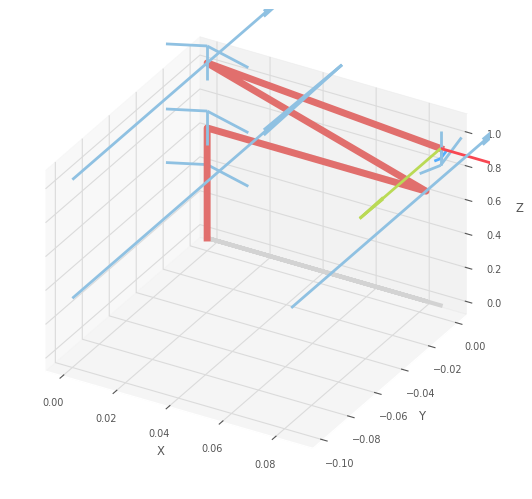

<Figure size 640x480 with 0 Axes>

In [12]:
# Animate the trajectory of manipulator, panda, from q0 to q
qt = rtb.tools.trajectory.jtraj(q0, q, 50)

# Plot the trajectory of the panda manipulator
panda.plot(qt.q, backend="pyplot", movie='1 panda.gif')